In [29]:
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(SeuratData))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(harmony))
set.seed(42)

In [2]:
pbmc_raw_scaled_direction <- "/home/arsham79/nsclc/results/1.normalized_and_scaled_pbmc.rds"
pbmc_integrated_batch_effect_removed_raw_direction <- "/home/arsham79/nsclc/results/2.seurat.integrated.rds"
pbmc_integrated_batch_effect_removed_scaled_direction <- "/home/arsham79/nsclc/results/3.pbmc_integrated_scaled_with_PCA_and_UMAP.rds"

In [3]:
pbmc <- readRDS(pbmc_raw_scaled_direction)

In [4]:
pbmc_count <- pbmc@assays$RNA
pbmc_count <- GetAssayData(pbmc_count)

In [5]:
barcodes <- data.table(brc = colnames(pbmc_count))
barcodes$ID <- sub("^.*?_(.*$)","\\1",barcodes$brc)
barcodes$counts <- Matrix::colSums(pbmc_count)

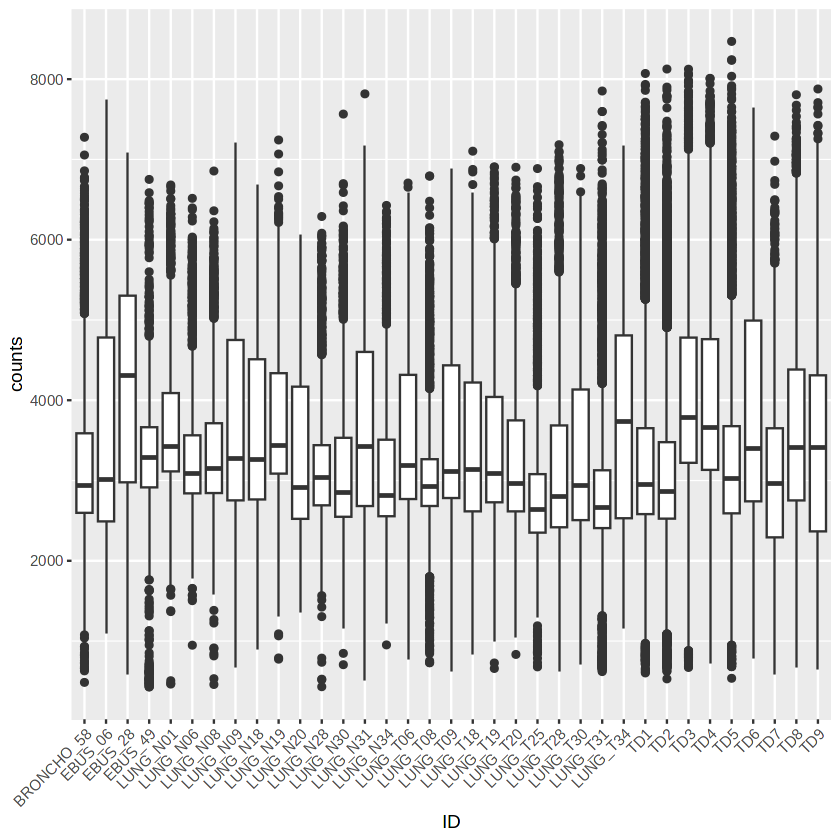

In [6]:
ggplot(barcodes, aes(x = ID, y = counts)) + geom_boxplot() + theme(axis.text.x = element_text(angle = 45, hjust = 1))

Now we aseess the integrated data

In [13]:
pbmc_integrated <- readRDS(pbmc_integrated_batch_effect_removed_scaled_direction)

In [14]:
pbmc_count_integrated_count <- pbmc_integrated@assays$integrated$data

In [15]:
barcodes <- data.table(brc = colnames(pbmc_count_integrated_count))
barcodes$ID <- sub("^.*?_(.*$)","\\1",barcodes$brc)
barcodes$counts <- Matrix::colSums(pbmc_count_integrated_count)

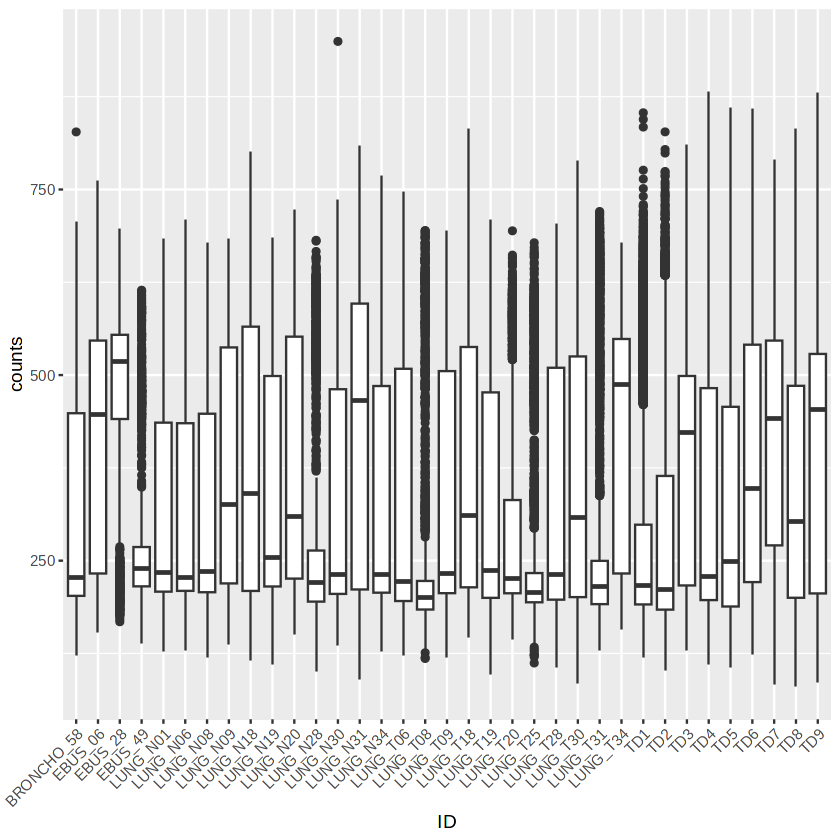

In [16]:
ggplot(barcodes, aes(x = ID, y = counts)) + geom_boxplot() + theme(axis.text.x = element_text(angle = 45, hjust = 1))

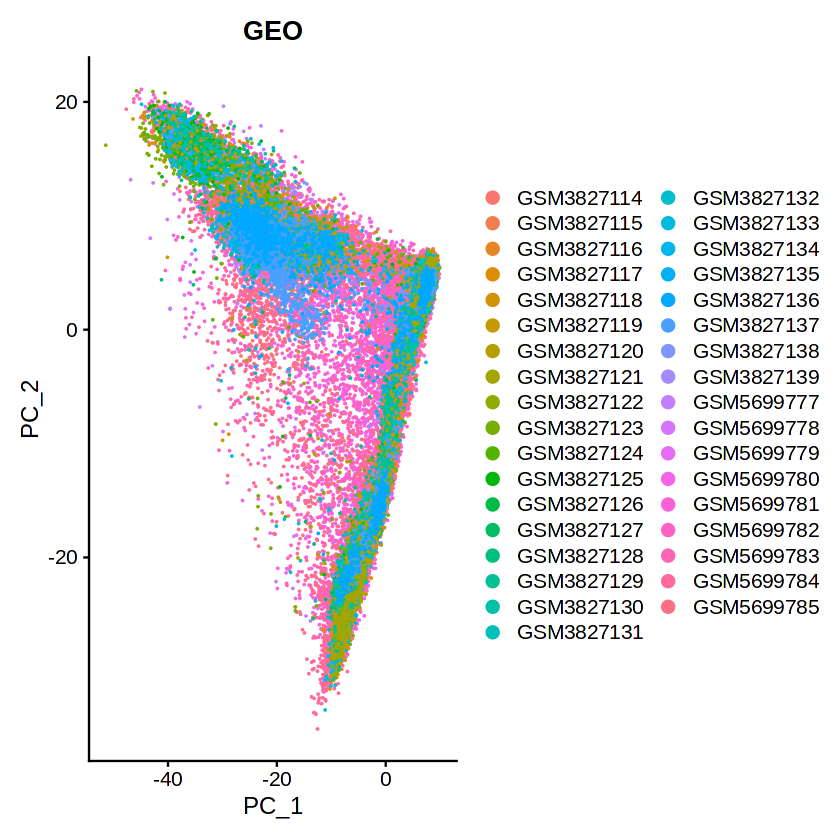

In [21]:
DimPlot(object = pbmc_integrated, reduction = "pca", group.by = "GEO", raster = FALSE)

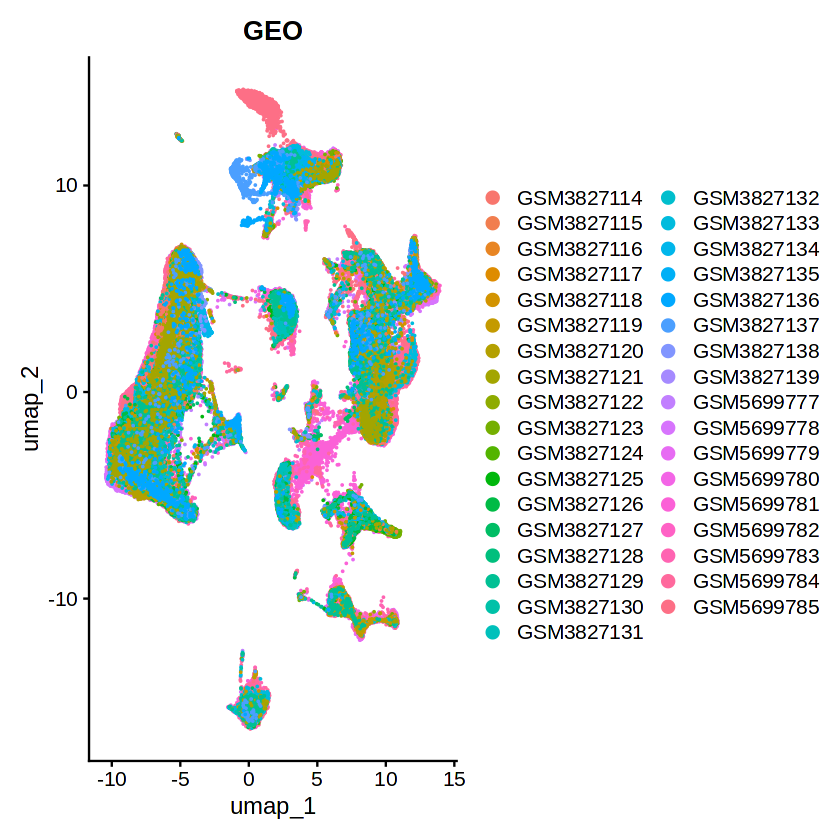

In [26]:
DimPlot(object = pbmc_integrated, reduction = "umap", group.by = "GEO", raster = FALSE)

In [27]:
YourSeuratObject <- Harmony::HarmonySeurat(pbmc_integrated, group.by.vars = "batch")

ERROR: Error in loadNamespace(x): there is no package called ‘Harmony’
